In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('used_cars_training_data.parquet')

numeric_features = df.select_dtypes(include=['float','int']).columns
binary_features = df.select_dtypes(include=['bool']).columns
categorical_features = list(df.select_dtypes(include=['object']).columns)

non_categorical_features = list(numeric_features) + list(binary_features)
df[non_categorical_features] = df[non_categorical_features].astype(float)

df.head()

,price (HUF),state,desing,financing,clock position (km),shippable persons number,number of doors,color,own weight (kg),total weight (kg),...,Take away from 25%,anti-theft,electrically adjustable headrests,home mains charger,type2 charging cable,amplifier,towing hook - electrically foldable,cd library,brand,matal
link,,,,,,,,,,,,,,,,,,,,,
https://www.hasznaltauto.hu/szemelyauto/volkswagen/passat/volkswagen_passat_2.0_tdi_bmt_comfortline_dsg_elso_tulajdonostol_gyari_fenyezesu_garantalt_kilometerrel-19076469#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,6895000.0,Kitűnő,Sedan,25%-tól elvihető,110000.0,5.0,4.0,fekete,1426.0,2040.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,volkswagen,1.0
https://www.hasznaltauto.hu/szemelyauto/citroen/c5_x/citroen_c5_x_1.6_puretech_hybrid_shine_plus_eat8_225_le-19321098#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,19400000.0,Kitűnő,Kombi,,17500.0,5.0,5.0,szürke,1797.0,2185.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,citroen,1.0
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/cla_200/mercedes-benz_cla_200_cdi_d_urban_7g-dct_afa-s_led_fenyszoro_parkolo-asszisztens-19066590#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,8990000.0,Kitűnő,Coupe,,73500.0,5.0,4.0,fehér,1525.0,2005.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,mercedes-benz,0.0
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/a_200/mercedes-benz_a_200_amg_line_7g-dct_afa-s_hosszutavu_berleti_lehetoseg_garancialis_integralt_szervizcsomag-19330075#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,15790000.0,Kitűnő,Ferdehátú,20%-tól elvihető,8000.0,5.0,5.0,fekete,1375.0,1885.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,mercedes-benz,0.0
https://www.hasznaltauto.hu/szemelyauto/mercedes-benz/b_250_e/mercedes-benz_b_250_e_amg_line_8g-dct_plug-in_hybrid_afa-s_hosszutavu_berleti_lehetoseg_kedvezo_finanszirozasi_opciok-19383161#sid=86e7090c-5a2e-4ca3-ada9-c7f346c714ab,16990000.0,Kitűnő,Egyterű,,7500.0,5.0,5.0,piros,1725.0,2225.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,mercedes-benz,1.0


In [3]:
X = df.drop(columns=['price (HUF)'])
y = df['price (HUF)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [4]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    #loss_function='MAE',
    #depth=9,
    #iterations=1000,
    min_child_samples=100,
    #rsm=0.2,
    cat_features=categorical_features,
)

model.fit(
    X_train, y_train,
    #eval_set=(X_test, y_val),
    early_stopping_rounds=100,
    verbose=100  # output the result every 100 iterations
)


Learning rate set to 0.068948
0:	learn: 5516598.9185937	total: 78.3ms	remaining: 1m 18s
100:	learn: 1426287.5575099	total: 1.73s	remaining: 15.4s
200:	learn: 1265023.1501337	total: 3.38s	remaining: 13.4s
300:	learn: 1173291.1784496	total: 5.04s	remaining: 11.7s
400:	learn: 1104040.9700829	total: 6.71s	remaining: 10s
500:	learn: 1048039.7617804	total: 8.33s	remaining: 8.3s
600:	learn: 1001589.0775762	total: 10s	remaining: 6.64s
700:	learn: 962081.4858077	total: 11.6s	remaining: 4.96s
800:	learn: 927846.5921015	total: 13.2s	remaining: 3.29s
900:	learn: 898259.2916882	total: 14.8s	remaining: 1.63s
999:	learn: 873600.8035612	total: 16.5s	remaining: 0us


In [5]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

print("Train MAPE: ", np.sqrt(metrics.mean_absolute_percentage_error(y_train, train_predictions)))
print("Test MAPE: ", np.sqrt(metrics.mean_absolute_percentage_error(y_test, test_predictions)))


Train MAPE:  0.5445728156912224
Test MAPE:  0.6291519453088462


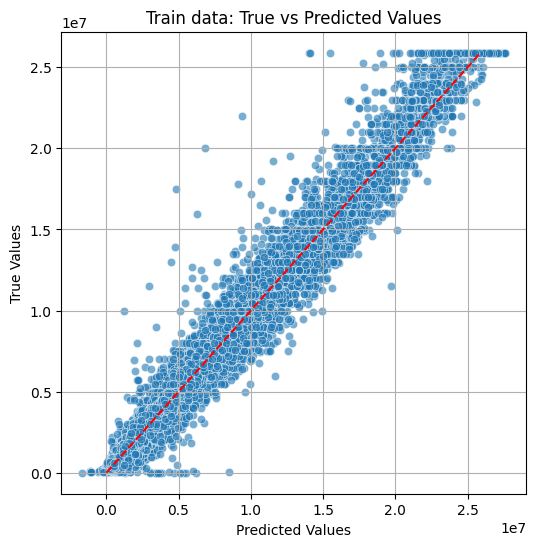

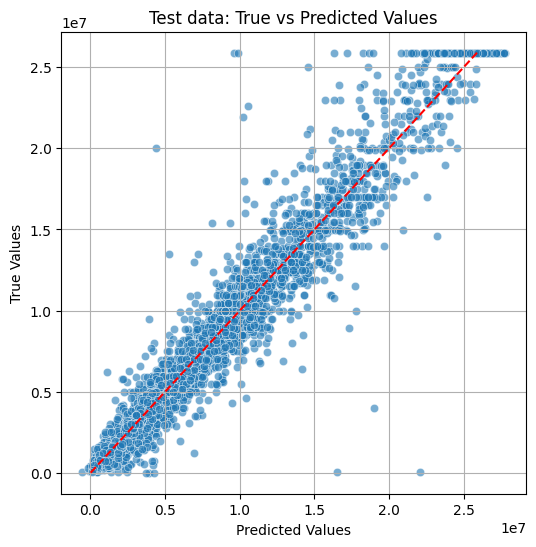

In [6]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_pred, y=y_true, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the results
plot_predictions(y_train, y_train_pred, 'Train data: True vs Predicted Values')
plot_predictions(y_test, y_test_pred, 'Test data: True vs Predicted Values')

In [7]:
model = CatBoostRegressor(
    #loss_function='MAE',
    depth=12,
    #iterations=1000,
    min_child_samples=100,
    rsm=0.2,
    cat_features=categorical_features,
)

model.fit(
    X, y,
    early_stopping_rounds=100,
    verbose=100  # output the result every 100 iterations
)

Learning rate set to 0.071422
0:	learn: 5490836.2126680	total: 167ms	remaining: 2m 46s
100:	learn: 1036711.4350441	total: 14.1s	remaining: 2m 5s
200:	learn: 787331.4400737	total: 27.7s	remaining: 1m 50s
300:	learn: 641897.5553986	total: 41.8s	remaining: 1m 37s
400:	learn: 535004.3624980	total: 56s	remaining: 1m 23s
500:	learn: 456484.1471270	total: 1m 10s	remaining: 1m 9s
600:	learn: 397305.3245082	total: 1m 24s	remaining: 55.9s
700:	learn: 347013.5764547	total: 1m 38s	remaining: 41.9s
800:	learn: 304097.3129768	total: 1m 58s	remaining: 29.3s
900:	learn: 268861.1350967	total: 2m 12s	remaining: 14.5s
999:	learn: 241357.1056519	total: 2m 26s	remaining: 0us


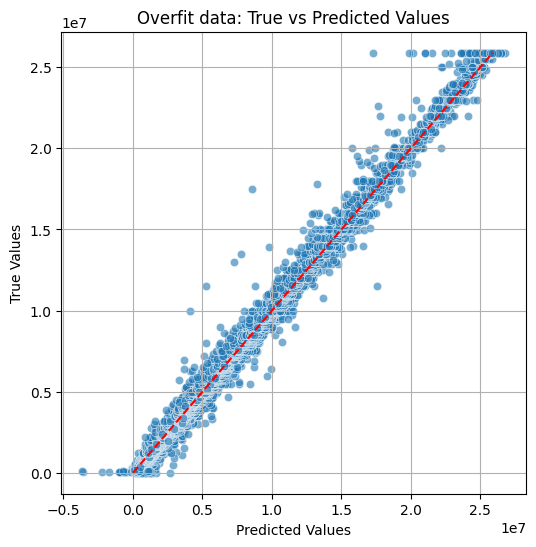

In [8]:
# Generate predictions
y_pred = model.predict(X)

# Plot the results
plot_predictions(y, y_pred, 'Overfit data: True vs Predicted Values')

In [19]:
difference = y_pred - y

In [10]:
df2 = df.copy()
df2['difference'] = difference

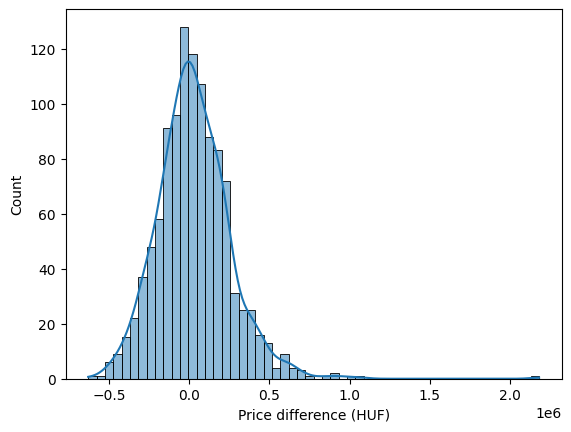

In [11]:
price_range = (df['price (HUF)'] > 1.3e6) & (df['price (HUF)'] < 1.55e6)

sns.histplot(x=difference[price_range], kde=True)
plt.xlabel('Price difference (HUF)')
#plt.xlim(-5e6, 5e6)
plt.show()

In [12]:
df[price_range]['age_days'].median()/365

16.424657534246574

In [13]:
df[price_range]['age_days'].mean()/365

17.196024086042602

In [14]:
df_select = df2[(difference>3e5) & price_range & (df['clock position (km)'] < 1.5e5) & (df['number of doors'] < 5)].sort_values('age_days')

In [15]:
import requests
from bs4 import BeautifulSoup
import ast
import re

def scrape_car_data(link):
    try:
        response = requests.get(link)
        soup = BeautifulSoup(response.content, 'html.parser')

        header = soup.find_all('div', {'class':'data-relay-banner'})
        
        if len(header) == 0:
            return None, None
        
        header = ast.literal_eval(header[0]['data-vehicle-information-banner-parameters'])
        advertisement_data =  soup.find_all('table', {'class':'hirdetesadatok'})
        # Get the text from xml
        advertisement_data = advertisement_data[0].get_text(separator='#')

        # Clean it
        advertisement_data = advertisement_data.strip()
        advertisement_data = re.sub(r'#\n', '', advertisement_data)

        # Get lines
        advertisement_data = advertisement_data.split('#')

        # Clean lines and create pairs
        advertisement_data = pd.Series(advertisement_data)

        # Add header to advertisment data
        advertisement_data.update(header)

        keys_id = advertisement_data.str.contains(':$')
        values_id = np.where(keys_id)[0] + 1
        keys = advertisement_data[keys_id]
        values = advertisement_data[values_id]
        advertisement_data = dict(zip(keys, values))


        # Get equipment info
        equipments = soup.find_all('div', {'class':'row felszereltseg'})
        if equipments:
            equipments = equipments[0].text.split('\n')

        # Get other info
        other = soup.find_all('div', {'class':'egyebinformacio'})
        if other:
            other = other[0].text.split('\n')
        
        # Get description 
        description = soup.find_all('div', {'class':'leiras'})
        if description:
            description = [description[0].text]        


        # Get oll special info about the car and clean it
        special_car_info = equipments + other + description
        if special_car_info:
            special_car_info = pd.Series(special_car_info)
            special_car_info = special_car_info.str.strip()
            special_car_info = special_car_info.str.lower()
            special_car_info = special_car_info.dropna()
            special_car_info = special_car_info[~special_car_info.isin(['', '-'])]

        return advertisement_data, special_car_info
    except Exception as e:
        print(e)
        return None, None

In [16]:
missing_car = [scrape_car_data(x)[0] is None for x in df_select.index]

In [17]:
df_select[~np.array(missing_car)]

,price (HUF),state,desing,financing,clock position (km),shippable persons number,number of doors,color,own weight (kg),total weight (kg),...,anti-theft,electrically adjustable headrests,home mains charger,type2 charging cable,amplifier,towing hook - electrically foldable,cd library,brand,matal,difference
link,,,,,,,,,,,,,,,,,,,,,
https://www.hasznaltauto.hu/szemelyauto/lada/granta/lada_granta_sedan_1.6_standard_magyarorszagi_-_serulesmentes_-_elso_tulajdonostol_-_garantalt_-_55.100_km-19529907#sid=d2a5d375-e5eb-41bb-b3ff-ebf52390a663,1499000.0,Other,Sedan,,55100.0,5.0,4.0,fehér,1080.0,1560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other,0.0,617023.958302
https://www.hasznaltauto.hu/szemelyauto/renault/twingo/renault_twingo_1.2_16v_dynamique-19539291#sid=ece9dd77-b6db-40a4-84d7-28ee5084c25c,1450000.0,Megkímélt,Ferdehátú,,71000.0,5.0,3.0,kék,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,renault,0.0,686453.251505
https://www.hasznaltauto.hu/szemelyauto/lada/4x4/lada_4x4_35000_km_szervokormany-18327027#sid=19f78013-560a-4b56-bbd7-1acb762269f2,1400000.0,Normál,Terepjáró,,35000.0,4.0,3.0,,1210.0,1610.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other,0.0,404136.752266
https://www.hasznaltauto.hu/szemelyauto/peugeot/207/peugeot_207_1.6_hdi_allure-19553460,1445000.0,Normál,Ferdehátú,,118015.0,5.0,3.0,fehér,1189.0,1649.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,peugeot,0.0,381708.692988
https://www.hasznaltauto.hu/szemelyauto/toyota/yaris/toyota_yaris_1.33_terra_plusz_klima_6_sebesseg_teljes_nagyszerviz_elvegezve-19425789,1499000.0,Kitűnő,Ferdehátú,,137620.0,5.0,3.0,,1115.0,1480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,toyota,0.0,503843.384199
https://www.hasznaltauto.hu/szemelyauto/hyundai/coupe/hyundai_coupe_2.0_gls_automata_ambivalencia_keves_km_garanciaval-19577818,1390000.0,Normál,Coupe,,118000.0,4.0,3.0,fekete,1417.0,1740.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hyundai,1.0,422902.180636
https://www.hasznaltauto.hu/szemelyauto/mitsubishi/colt/mitsubishi_colt_cabrio_1.5_invite-19523830#sid=7bc0d2d8-ac68-42b0-8ab5-7b6f7b7e3cfc,1500000.0,Kitűnő,Cabrio,,117000.0,4.0,2.0,fekete,1110.0,1460.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mitsubishi,0.0,342325.120903
https://www.hasznaltauto.hu/szemelyauto/suzuki/sj_samurai/suzuki_sj_samurai_sj-19071371#sid=73656f96-abd6-4dcb-a129-0a3943776c53,1390000.0,Other,Terepjáró,,1630.0,4.0,3.0,fekete,840.0,1190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,suzuki,0.0,380120.639580
https://www.hasznaltauto.hu/szemelyauto/volkswagen/1200/volkswagen_1200_gyari_allapot_mo-i_uj_koratol-19529382#sid=563b1123-ff7e-4a1c-8638-9f709307ef26,1490000.0,Megkímélt,Ferdehátú,,53568.0,5.0,2.0,fehér,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,volkswagen,0.0,646527.270070


In [22]:
df_select2 = df2[(df['clock position (km)'] < 1.5e5) & (df['number of doors'] < 5) & (df['state'].isin(['Kítűnő']))].sort_values('age_days').head(10)

In [23]:
missing_car2 = [scrape_car_data(x)[0] is None for x in df_select2.index]

In [24]:
df_select2[~np.array(missing_car2)]

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''